In [1]:
#importing dependancies 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
#loading the dataset to a pandas Dataframe
data = pd.read_csv('datasets/diamond_security_system.csv')

In [3]:
# printing the head of data
data.head()

,DiamondID,DiamondName,DateOfMining,OwnerName,DiamondPrice,DiamondRating,Carat,Cut,Color,Clarity,...,Fluorescence,Girdle,Culet,Length_CW_Ratio,Width_CW_Ratio,Height_CW_Ratio,Ang_Pav_Polish,Ang_Girdle,Ang_Culet,Authentic
0,GIA10000,Kohinoor,1526,Ananya Patel,576625,7.57,0.3,3,4,3.0,...,Faint,Thin,Large,1.037574,0.963787,0.854893,0.273462,5.100208,6.473731,1
1,GIA10001,Hope Diamond,1666,Aditya Sharma,557419,8.14,0.7,4,5,2.0,...,Faint,Thick,Large,1.475181,0.677883,0.555914,9.924448,3.329701,2.347622,1
2,GIA10002,Blue Moon Diamond,2014,Aarav Singh,665386,9.03,0.5,1,6,4.0,...,Medium,Medium,Large,1.153349,0.867040,0.687244,1.077413,8.218450,6.763676,1
3,GIA10003,Star of Africa,1905,Akshay Desai,456223,9.99,1.5,3,5,3.0,...,Faint,Medium,Small,0.517262,1.933256,0.435962,8.855525,4.592631,3.086526,1
4,GIA10004,Regent Diamond,1701,Bhavya Joshi,563894,9.32,0.9,2,7,0.1,...,NaN,Medium,Small,0.914433,1.093574,0.347979,4.132917,6.861855,7.191979,1


In [4]:
# number of rows and columns
data.shape

(301, 28)

In [5]:
# Check summary statistics
print(data.describe())

       DateOfMining   DiamondPrice  DiamondRating       Carat         Cut  \
count    301.000000     301.000000     301.000000  301.000000  301.000000   
mean    1914.431894  199663.767442       8.227575    0.902658    2.465116   
std       70.512643  271793.160832       1.007196    0.331350    1.114875   
min     1526.000000   18295.000000       6.510000    0.300000    1.000000   
25%     1863.000000   18485.000000       7.390000    0.600000    1.000000   
50%     1921.000000   18718.000000       8.260000    0.800000    2.000000   
75%     1974.000000  367691.000000       9.120000    1.200000    3.000000   
max     2022.000000  983637.000000      10.000000    1.500000    4.000000   

            Color     Clarity    Symmetry       Depth       Table     Length   \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean     6.069767    2.118272    2.013289   59.822632   59.908852    6.377651   
std      1.411305    1.436488    0.832560    6.006179    5.6900

In [6]:
# Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DiamondID          301 non-null    object 
 1   DiamondName        301 non-null    object 
 2   DateOfMining       301 non-null    int64  
 3   OwnerName          301 non-null    object 
 4   DiamondPrice       301 non-null    int64  
 5   DiamondRating      301 non-null    float64
 6   Carat              301 non-null    float64
 7   Cut                301 non-null    int64  
 8   Color              301 non-null    int64  
 9   Clarity            301 non-null    float64
 10  Symmetry           301 non-null    int64  
 11  Depth              301 non-null    float64
 12  Table              301 non-null    float64
 13   Length            301 non-null    float64
 14   Width             301 non-null    float64
 15   Height            301 non-null    float64
 16   Cut_Grade         301 non

In [7]:
# Define a list of parameters (columns) to visualize
parameters = ['Carat', 'Cut', 'Color', 'Clarity', 'Symmetry']

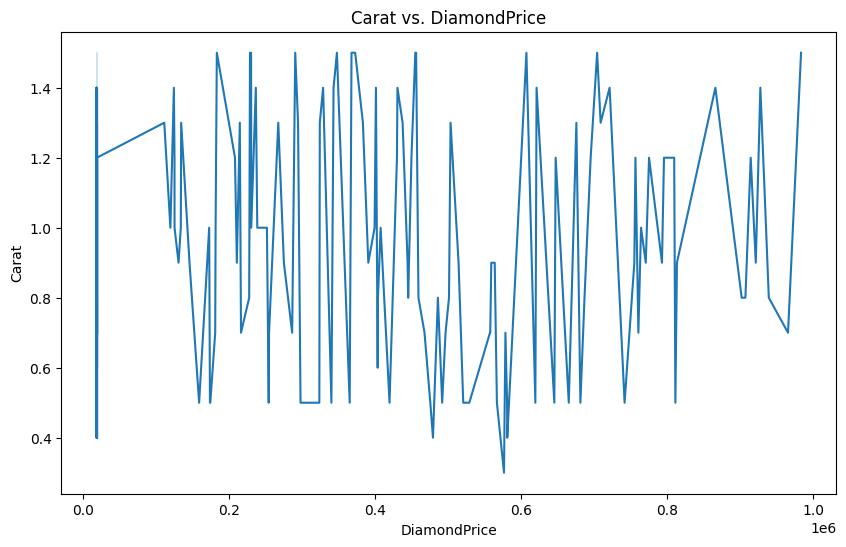

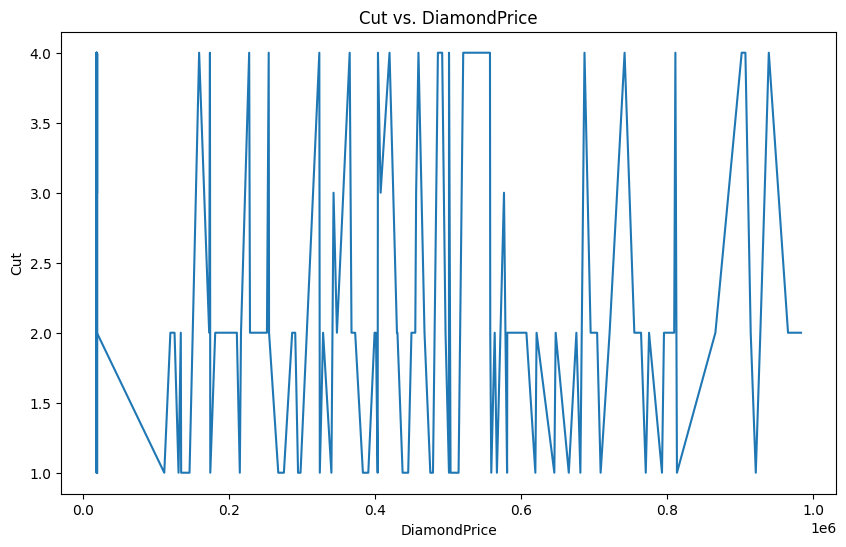

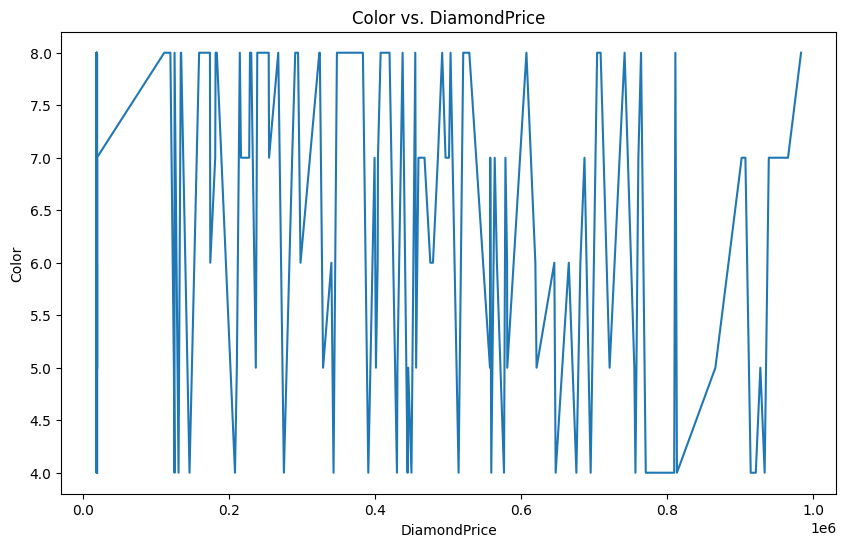

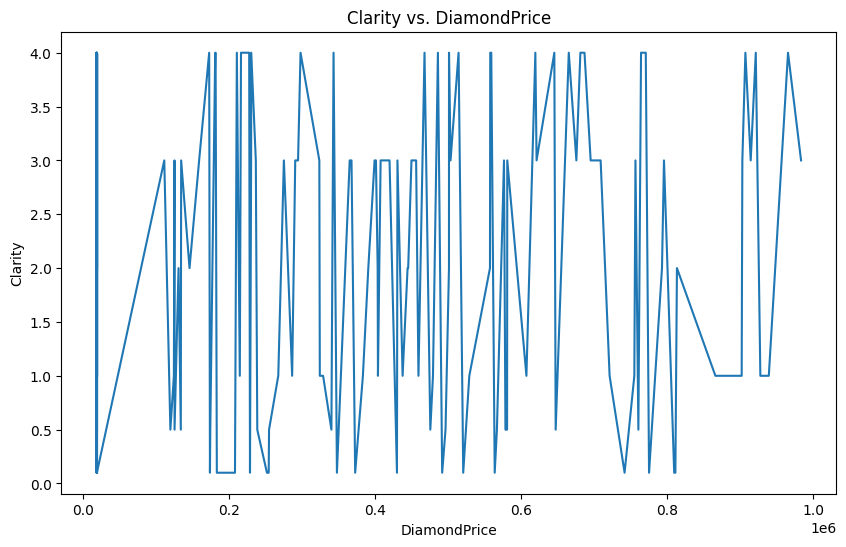

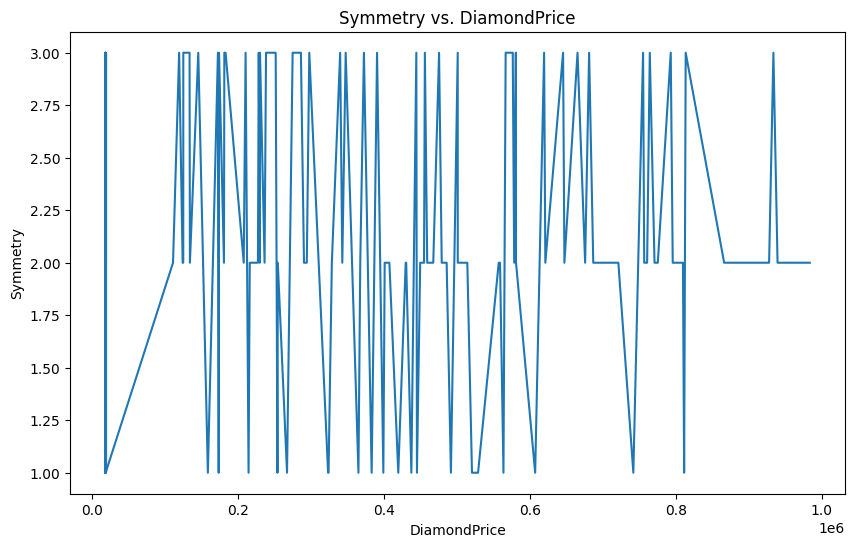

In [12]:
# Visualize each parameter against the target variable
for parameter in parameters:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='DiamondPrice', y=parameter, data=data)
    plt.title(f'{parameter} vs. DiamondPrice')
    plt.xlabel('DiamondPrice')
    plt.ylabel(parameter)
    plt.show()

In [13]:
# Assuming diamond_df is your original dataset DataFrame
selected_columns = ['Carat', 'Cut', 'Color', 'Clarity', 'Symmetry', 'Authentic','DiamondPrice']
new_dataset = data[selected_columns].copy()

In [14]:
new_dataset.head()

,Carat,Cut,Color,Clarity,Symmetry,Authentic,DiamondPrice
0,0.3,3,4,3.0,3,1,576625
1,0.7,4,5,2.0,2,1,557419
2,0.5,1,6,4.0,3,1,665386
3,1.5,3,5,3.0,3,1,456223
4,0.9,2,7,0.1,1,1,563894


In [15]:
new_dataset.shape

(301, 7)

In [16]:
# separating data and Labels
X = new_dataset.iloc[:,:-1]
print(X)

     Carat  Cut  Color  Clarity  Symmetry  Authentic
0      0.3    3      4      3.0         3          1
1      0.7    4      5      2.0         2          1
2      0.5    1      6      4.0         3          1
3      1.5    3      5      3.0         3          1
4      0.9    2      7      0.1         1          1
..     ...  ...    ...      ...       ...        ...
296    0.7    3      5      2.0         3          0
297    1.3    1      6      0.5         1          0
298    0.6    3      4      0.1         1          0
299    1.2    4      7      2.0         1          0
300    0.7    3      8      3.0         1          0

[301 rows x 6 columns]


In [17]:
Y = new_dataset.iloc[:,-1]
print(Y)

0      576625
1      557419
2      665386
3      456223
4      563894
        ...  
296     18304
297     18299
298     18296
299     18295
300     18295
Name: DiamondPrice, Length: 301, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(301, 6) (270, 6) (31, 6)


In [20]:
# use of SVC algorithm
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,Y_train)

SVC()

In [21]:
# accuracy of SVC algorithm

#accuracy on training data
X_train_prediction = model_svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of SVC=',ov )

Accuracy on training data :  0.014814814814814815
Accuracy on test data :  0.0
Overall acuracy of SVC= 0.7407407407407408


In [30]:
from sklearn.linear_model import LinearRegression
model_linearReg = LinearRegression()
model_linearReg.fit(X_train,Y_train)

LinearRegression()

In [33]:
from sklearn.metrics import accuracy_score
# Predict on the testing data
y_pred = model_linearReg.predict(X_test)

threshold = 0.5  # You can adjust this threshold as needed
y_pred_binary = (y_pred >= threshold).astype(int)
Y_test_binary = (Y_test >= threshold).astype(int)

# Calculate accuracy score
accuracy = accuracy_score(Y_test_binary, y_pred_binary)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7741935483870968


In [35]:

input_data = [0.3,3,4,3.0,3,1]

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_linearReg.predict(input_data_reshaped)
print(prediction)

[550946.60105257]


C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
import pickle
pickle.dump(model_linearReg,open('DiamondPrice_linearReg.pkl','wb'))